## Movie Review Classification

![This is getting exciting](https://i.kinja-img.com/gawker-media/image/upload/s--hIgTSFEs--/c_fit,fl_progressive,q_80,w_320/17j2zn73qxdlfgif.jpg)

Using all that we have learned, we will now combine our techniques to perform some basic classifcation! We'll be using the nltk movie reviews data set, we will classify positive and negative reviews. Here's some code to get you started:

In [1]:
from nltk.corpus import movie_reviews as reviews

X = [reviews.raw(fileid) for fileid in reviews.fileids()]
y = [reviews.categories(fileid)[0] for fileid in reviews.fileids()]

# 1 - Print a positive and negative review:

In [2]:
print(reviews.categories())

['neg', 'pos']


In [3]:
from collections import Counter
Counter(y)

Counter({'neg': 1000, 'pos': 1000})

In [4]:
def pos_movies():
    for i in range(0,len(X)):
        if y[i] == 'pos':
            print(X[i])
        return(i)
            
if __name__ == "__pos_movies__":
    pos_movies()

In [5]:
##positive 
print("\033[1m" + "\033[94m" + "Positive Review:\n" + 11*"-")
print(X[-1])

Positive Review:
-----------
truman ( " true-man " ) burbank is the perfect name for jim carrey's character in this film . 
president truman was an unassuming man who became known worldwide , in spite of ( or was it because of ) his stature . 
 " truman " also recalls an era of plenty following a grim war , an era when planned communities built by government scientists promised an idyllic life for americans . 
and burbank , california , brings to mind the tonight show and the home of nbc . 
if hollywood is the center of the film world , burbank is , or was , the center of tv's world , the world where our protagonist lives . 
combine all these names and concepts into " truman burbank , " and you get something that well describes him and his artificial world . 
truman leads the perfect life . 
his town , his car , and his wife are picture perfect . 
his idea of reality comes under attack one day when a studio light falls from the sky . 
the radio explains that an overflying airplane star

In [6]:
##negative 
print("\033[1m" + "\033[94m" + "Negative Review:\n" + 11*"-")
print(X[0])

Negative Review:
-----------
plot : two teen couples go to a church party , drink and then drive . 
they get into an accident . 
one of the guys dies , but his girlfriend continues to see him in her life , and has nightmares . 
what's the deal ? 
watch the movie and " sorta " find out . . . 
critique : a mind-fuck movie for the teen generation that touches on a very cool idea , but presents it in a very bad package . 
which is what makes this review an even harder one to write , since i generally applaud films which attempt to break the mold , mess with your head and such ( lost highway & memento ) , but there are good and bad ways of making all types of films , and these folks just didn't snag this one correctly . 
they seem to have taken this pretty neat concept , but executed it terribly . 
so what are the problems with the movie ? 
well , its main problem is that it's simply too jumbled . 
it starts off " normal " but then downshifts into this " fantasy " world in which you , as an

# 2 - Using the scikit train_test_split function (http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html), split the data into a training set and a test set. 

Splitting the dataset into 80% and 20%, then creating an array based on y_test

In [62]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = 1)

In [63]:
#process y_test: transform to array and recode to 1 (pos) and 0 (neg)
import numpy as np
y_test_np = np.asarray(y_test)

# 3 - Then lemmatize or stem the reviews, and transform the documents to tf-idf.

This is model 1: 

TfidfVectorizer(max_features=None,min_df=1)

LogisticRegression(C = 0.5, fit_intercept = True, penalty = 'l1')

In [64]:
# import and instantiate TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
model = TfidfVectorizer(max_features=None,min_df=1)
model

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words=None, strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

In [65]:
# learn the vocabulary in the training data, then use it to create a document-term matrix
train_X_dtm = model.fit_transform(X_train)
# examine the document-term matrix created from X_train
train_X_dtm

<1600x36270 sparse matrix of type '<class 'numpy.float64'>'
	with 531442 stored elements in Compressed Sparse Row format>

In [66]:
# transform the test data using the earlier fitted vocabulary, into a document-term matrix
test_X_dtm = model.transform(X_test)
# examine the document-term matrix from X_test
test_X_dtm

<400x36270 sparse matrix of type '<class 'numpy.float64'>'
	with 131727 stored elements in Compressed Sparse Row format>

# 4 - Finally, build a model. To start, use a logistic regression (which we will review in detail in the coming lectures) (http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

In [67]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C = 0.5, fit_intercept = True, penalty = 'l1')
lr.fit(train_X_dtm, y_train)

LogisticRegression(C=0.5, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

# 5 - Measure the efficacy of your model using the Reciever Operator Characteristic (ROC) Area Under the Curve (AUC). Report this metric on the test set of your data.

For more info on this, see: http://scikit-learn.org/stable/auto_examples/model_selection/plot_roc_crossval.html#sphx-glr-auto-examples-model-selection-plot-roc-crossval-py

In [68]:
y_pred = lr.predict(test_X_dtm)

In [69]:
import pandas as pd
dataset = pd.DataFrame({'y_test': y_test_np, 'y_pred': y_pred, }, columns=['y_test', 'y_pred'])
#dataset

[[121  79]
 [ 58 142]]


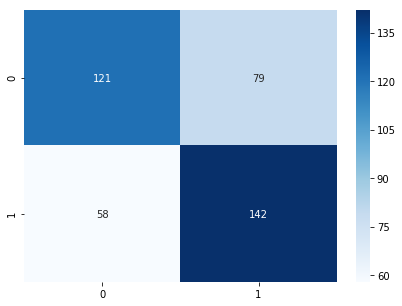

In [70]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import confusion_matrix
conf_arr = confusion_matrix(y_test, y_pred)

print(conf_arr)

df_cm = pd.DataFrame(conf_arr, index = [i for i in "01"],
                  columns = [i for i in "01"])
plt.figure(figsize = (7,5))
sn.heatmap(df_cm, annot=True, fmt="d", cmap="Blues")

In [71]:
def label_recode(series):
    if series == "pos":
        return 1
    elif series == "neg":
        return 0
    
dataset['y_pred'] = dataset['y_pred'].apply(label_recode)

In [72]:
dataset['y_test'] = dataset['y_test'].apply(label_recode)

In [74]:
y_test = dataset['y_test']
y_pred = dataset['y_pred']

from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

[0.    0.395 1.   ]
[0.   0.71 1.  ]
[2 1 0]
0.6575


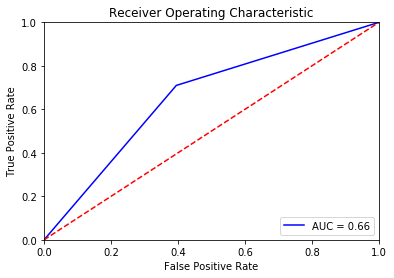

In [75]:
from sklearn.metrics import roc_curve, auc

lr_fpr, lr_tpr, thresholds = roc_curve(y_test, y_pred)
lr_roc_auc = auc(lr_fpr, lr_tpr)

print(lr_fpr)
print(lr_tpr)
print(thresholds)
print(lr_roc_auc)
plt.title('Receiver Operating Characteristic')
plt.plot(lr_fpr, lr_tpr, 'b', label = 'AUC = %0.2f' % lr_roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# 6 - Change a parameter in your model (introduce regularization) or change a parameter in your word vector transformation (http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html). Try introducing the use of stop words, or employing a cutoff on terms with min or max df.

This is model 2:

TfidfVectorizer(max_features=None, stop_words='english', use_idf=True, lowercase=True,
                        min_df=0.1,  max_df = 0.9, smooth_idf = True, sublinear_tf = True,
                        tokenizer = tokenize)
                        
LogisticRegression(C = 0.5, fit_intercept = True, penalty = 'l1')

In [76]:
tokenize = lambda doc: doc.lower().split(" ")

In [77]:
model2 = TfidfVectorizer(max_features=None, stop_words='english', use_idf=True, lowercase=True,
                        min_df=0.1,  max_df = 0.9, smooth_idf = True, sublinear_tf = True,
                        tokenizer = tokenize)
model2

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=0.9, max_features=None, min_df=0.1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words='english', strip_accents=None, sublinear_tf=True,
        token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=<function <lambda> at 0x1a16f217b8>, use_idf=True,
        vocabulary=None)

In [78]:
# learn the vocabulary in the training data, then use it to create a document-term matrix
X_train2 = model2.fit_transform(X_train)
# examine the document-term matrix created from X_train
X_train2

<1600x389 sparse matrix of type '<class 'numpy.float64'>'
	with 125183 stored elements in Compressed Sparse Row format>

In [79]:
# transform the test data using the earlier fitted vocabulary, into a document-term matrix
X_test2 = model2.transform(X_test)
# examine the document-term matrix from X_test
X_test2

<400x389 sparse matrix of type '<class 'numpy.float64'>'
	with 31723 stored elements in Compressed Sparse Row format>

In [90]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C = 0.5, fit_intercept = True, penalty = 'l1')
lr.fit(X_train2, y_train)

y_pred2 = lr.predict(X_test2)

In [91]:
dataset['y_pred2'] = y_pred2

In [92]:
def label_recode(series):
    if series == "pos":
        return 1
    elif series == "neg":
        return 0
    
dataset['y_pred2'] = dataset['y_pred2'].apply(label_recode)

[[141  59]
 [ 49 151]]


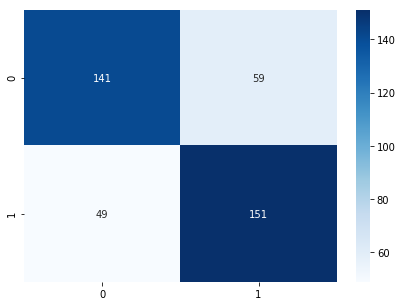

In [93]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import confusion_matrix
conf_arr2 = confusion_matrix(y_test_np, y_pred2)

print(conf_arr2)

df_cm2 = pd.DataFrame(conf_arr2, index = [i for i in "01"],
                  columns = [i for i in "01"])
plt.figure(figsize = (7,5))
sn.heatmap(df_cm2, annot=True, fmt="d", cmap="Blues")

[0.    0.295 1.   ]
[0.    0.755 1.   ]
[2 1 0]
0.7300000000000001


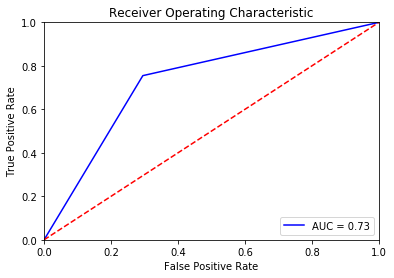

In [94]:
y_pred2 = dataset['y_pred2']

from sklearn.metrics import roc_curve, auc

lr_fpr, lr_tpr, thresholds = roc_curve(y_test, y_pred2)
lr_roc_auc = auc(lr_fpr, lr_tpr)

print(lr_fpr)
print(lr_tpr)
print(thresholds)
print(lr_roc_auc)
plt.title('Receiver Operating Characteristic')
plt.plot(lr_fpr, lr_tpr, 'b', label = 'AUC = %0.2f' % lr_roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

This model 3:
    
TfidfVectorizer(max_features=None, stop_words='english', use_idf=True, lowercase=True,
                        min_df=0.1,  max_df = 0.9, smooth_idf = True, sublinear_tf = True,
                        tokenizer = tokenize)
                        
LogisticRegression(C = 0.8, fit_intercept = True, penalty = 'l1', tol = 9e-4)

In [95]:
#model 3
model3 = TfidfVectorizer(max_features=None, stop_words='english', use_idf=True, lowercase=True,
                        min_df=0.1,  max_df = 0.9, smooth_idf = True, sublinear_tf = True,
                        tokenizer = tokenize)
model3

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=0.9, max_features=None, min_df=0.1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words='english', strip_accents=None, sublinear_tf=True,
        token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=<function <lambda> at 0x1a16f217b8>, use_idf=True,
        vocabulary=None)

In [96]:
# learn the vocabulary in the training data, then use it to create a document-term matrix
X_train3 = model3.fit_transform(X_train)
# examine the document-term matrix created from X_train
X_train3

# transform the test data using the earlier fitted vocabulary, into a document-term matrix
X_test3 = model3.transform(X_test)
# examine the document-term matrix from X_test
X_test3

<400x389 sparse matrix of type '<class 'numpy.float64'>'
	with 31723 stored elements in Compressed Sparse Row format>

In [97]:
lr = LogisticRegression(C = 0.8, fit_intercept = True, penalty = 'l1', tol = 9e-4)
lr.fit(X_train3, y_train)

y_pred3 = lr.predict(X_test3)

In [98]:
dataset['y_pred3'] = y_pred3

In [99]:
def label_recode(series):
    if series == "pos":
        return 1
    elif series == "neg":
        return 0
    
dataset['y_pred3'] = dataset['y_pred3'].apply(label_recode)

[[149  51]
 [ 46 154]]


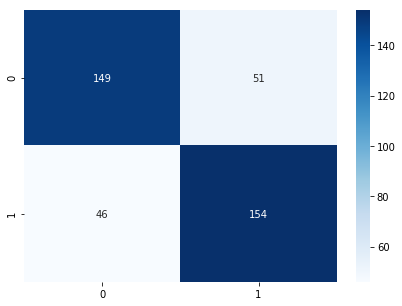

In [102]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import confusion_matrix
conf_arr3 = confusion_matrix(y_test_np, y_pred3)

print(conf_arr3)

df_cm3 = pd.DataFrame(conf_arr3, index = [i for i in "01"],
                  columns = [i for i in "01"])
plt.figure(figsize = (7,5))
sn.heatmap(df_cm3, annot=True, fmt="d", cmap="Blues")

[0.    0.255 1.   ]
[0.   0.77 1.  ]
[2 1 0]
0.7575000000000001


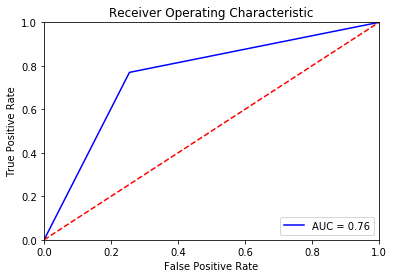

In [103]:
y_pred3 = dataset['y_pred3']

from sklearn.metrics import roc_curve, auc

lr_fpr, lr_tpr, thresholds = roc_curve(y_test, y_pred3)
lr_roc_auc = auc(lr_fpr, lr_tpr)

print(lr_fpr)
print(lr_tpr)
print(thresholds)
print(lr_roc_auc)
plt.title('Receiver Operating Characteristic')
plt.plot(lr_fpr, lr_tpr, 'b', label = 'AUC = %0.2f' % lr_roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

This is model 4:

TfidfVectorizer(max_features = None, stop_words='english', use_idf=True, lowercase=True,
                        min_df=0.1,  max_df = 0.9, smooth_idf = True, sublinear_tf = True,
                        tokenizer = tokenize, ngram_range=(1, 2))
                        
LogisticRegression(C = 0.89, fit_intercept = True, penalty = 'l2', tol = 8e-9, solver = 'sag',
                       class_weight = 'balanced', warm_start = True, max_iter = 180,
                       multi_class = 'ovr')

In [104]:
#model 4
model4 = TfidfVectorizer(max_features = None, stop_words='english', use_idf=True, lowercase=True,
                        min_df=0.1,  max_df = 0.9, smooth_idf = True, sublinear_tf = True,
                        tokenizer = tokenize, ngram_range=(1, 2))
model4

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=0.9, max_features=None, min_df=0.1,
        ngram_range=(1, 2), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words='english', strip_accents=None, sublinear_tf=True,
        token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=<function <lambda> at 0x1a16f217b8>, use_idf=True,
        vocabulary=None)

In [105]:
# learn the vocabulary in the training data, then use it to create a document-term matrix
X_train4 = model4.fit_transform(X_train)
# examine the document-term matrix created from X_train
X_train4

# transform the test data using the earlier fitted vocabulary, into a document-term matrix
X_test4 = model4.transform(X_test)
# examine the document-term matrix from X_test
X_test4

<400x487 sparse matrix of type '<class 'numpy.float64'>'
	with 39800 stored elements in Compressed Sparse Row format>

In [106]:
lr = LogisticRegression(C = 0.89, fit_intercept = True, penalty = 'l2', tol = 8e-9, solver = 'sag',
                       class_weight = 'balanced', warm_start = True, max_iter = 180,
                       multi_class = 'ovr')
lr.fit(X_train4, y_train)

y_pred4 = lr.predict(X_test4)

In [107]:
dataset['y_pred4'] = y_pred4

In [108]:
def label_recode(series):
    if series == "pos":
        return 1
    elif series == "neg":
        return 0
    
dataset['y_pred4'] = dataset['y_pred4'].apply(label_recode)

[[154  46]
 [ 49 151]]


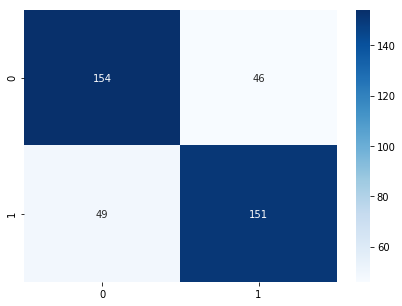

In [110]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import confusion_matrix
conf_arr4 = confusion_matrix(y_test_np, y_pred4)

print(conf_arr4)

df_cm4 = pd.DataFrame(conf_arr4, index = [i for i in "01"],
                  columns = [i for i in "01"])
plt.figure(figsize = (7,5))
sn.heatmap(df_cm4, annot=True, fmt="d", cmap="Blues")

[0.   0.23 1.  ]
[0.    0.755 1.   ]
[2 1 0]
0.7625000000000001


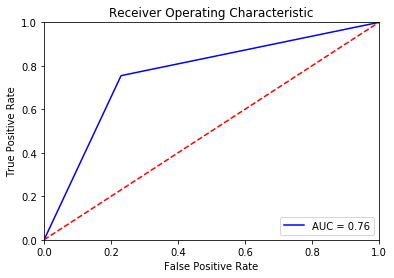

In [111]:
y_pred4 = dataset['y_pred4']

from sklearn.metrics import roc_curve, auc

lr_fpr, lr_tpr, thresholds = roc_curve(y_test, y_pred4)
lr_roc_auc = auc(lr_fpr, lr_tpr)

print(lr_fpr)
print(lr_tpr)
print(thresholds)
print(lr_roc_auc)
plt.title('Receiver Operating Characteristic')
plt.plot(lr_fpr, lr_tpr, 'b', label = 'AUC = %0.2f' % lr_roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

This is model 5:

TfidfVectorizer(max_features = None, stop_words='english', use_idf=True, lowercase=True,
                        min_df=0.1,  max_df = 0.9, smooth_idf = True, sublinear_tf = True,
                        tokenizer = tokenize, ngram_range=(1, 2))
                        
Grid Search: LogisticRegression(C = 15, fit_intercept = True, penalty = 'l1')

In [112]:
#model 5: use grid search method
from sklearn.pipeline import make_pipeline
from sklearn.grid_search import GridSearchCV
# Logistic Regression
pip_logmod = make_pipeline(LogisticRegression(class_weight="balanced"))
hyperparam_range = np.arange(0.5, 20.1, 0.5)
hyperparam_grid = {"logisticregression__penalty": ["l1", "l2"],
                   "logisticregression__C":  hyperparam_range,
                   "logisticregression__fit_intercept": [True, False]
                  }
gs_logmodel = GridSearchCV(pip_logmod,
                           hyperparam_grid,
                           scoring="accuracy",
                           cv=2,
                           n_jobs=-1)
gs_logmodel.fit(X_train4, y_train)
print(f"\033[1m\033[0mThe best hyperparameters:\n{'-' * 25}")
for hyperparam in gs_logmodel.best_params_.keys():
    print(hyperparam[hyperparam.find("__") + 2:], ": ", gs_logmodel.best_params_[hyperparam])
print(f"\033[1m\033[94mBest 10-folds CV f1-score: {gs_logmodel.best_score_ * 100:.2f}%.")


/Users/shuixin/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/shuixin/anaconda3/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


The best hyperparameters:
-------------------------
C :  2.0
fit_intercept :  True
penalty :  l1
Best 10-folds CV f1-score: 74.94%.


[[154  46]
 [ 49 151]]


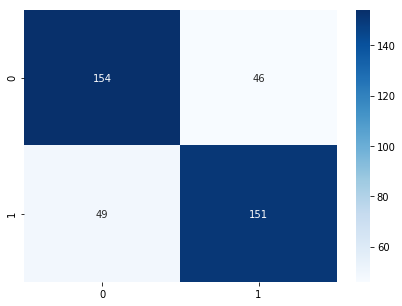

In [113]:
model = LogisticRegression(C = 15, fit_intercept = True, penalty = 'l1')
lr.fit(X_train4, y_train)

y_pred5 = lr.predict(X_test4)
conf_arr = confusion_matrix(y_test_np, y_pred5)
print(conf_arr)

df_cm = pd.DataFrame(conf_arr, index = [i for i in "01"],
                  columns = [i for i in "01"])
plt.figure(figsize = (7,5))
sn.heatmap(df_cm, annot=True, fmt="d", cmap="Blues")

In [116]:
dataset['y_pred5'] = y_pred5

In [118]:
def label_recode(series):
    if series == "pos":
        return 1
    elif series == "neg":
        return 0
    
dataset['y_pred5'] = dataset['y_pred5'].apply(label_recode)

[0.   0.23 1.  ]
[0.    0.755 1.   ]
[2 1 0]
0.7625000000000001


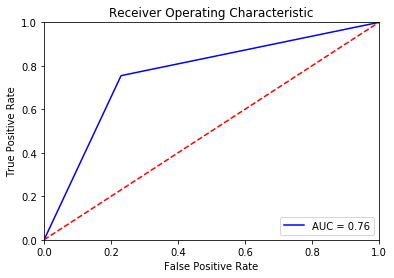

In [120]:
y_pred5 = dataset['y_pred5']

from sklearn.metrics import roc_curve, auc

lr_fpr, lr_tpr, thresholds = roc_curve(y_test, y_pred5)
lr_roc_auc = auc(lr_fpr, lr_tpr)

print(lr_fpr)
print(lr_tpr)
print(thresholds)
print(lr_roc_auc)
plt.title('Receiver Operating Characteristic')
plt.plot(lr_fpr, lr_tpr, 'b', label = 'AUC = %0.2f' % lr_roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

7 - Make four models in total, changing parameters and comparing the AUC results. Report your findings in a tabular form.

In [135]:
from IPython.display import HTML, display
import tabulate
table = [["model","Accuracy","AUC", "Tfidf Vectorizer", "Logistic Regression"],
         ["model1","65.75%",0.66,"max_features=None, min_df=1", "C = 0.5, fit_intercept = True, penalty = 'l1'"],
         ["model2","73.00%",0.73, "max_features=None, stop_words='english', min_df=0.1,  max_df = 0.9,tokenizer = tokenize", 
          "C = 0.5, fit_intercept = True, penalty = 'l1'"],
         ["model3","75.75%",0.76, "max_features=None, stop_words='english', min_df=0.1,  max_df = 0.9, tokenizer = tokenize", 
         "C = 0.8, fit_intercept = True, penalty = 'l1', tol = 9e-4"],
        ["model4","76.25%",0.76, "max_features = None, stop_words='english', min_df=0.1,  max_df = 0.9, tokenizer = tokenize, ngram_range=(1, 2)",
        "C = 0.89, fit_intercept = True, penalty = 'l2', tol = 8e-9, solver = 'sag', class_weight = 'balanced', warm_start = True, max_iter = 180,"],
        ["model5","76.25%",0.76, "max_features = None, stop_words='english', min_df=0.1,  max_df = 0.9, tokenizer = tokenize, ngram_range=(1, 2)",
        "Grid Search: C = 15, fit_intercept = True, penalty = 'l1'"]]
display(HTML(tabulate.tabulate(table, tablefmt='html')))

model,Accuracy,AUC,Tfidf Vectorizer,Logistic Regression
model1,65.75%,0.66,"max_features=None, min_df=1","C = 0.5, fit_intercept = True, penalty = 'l1'"
model2,73.00%,0.73,"max_features=None, stop_words='english', min_df=0.1, max_df = 0.9,tokenizer = tokenize","C = 0.5, fit_intercept = True, penalty = 'l1'"
model3,75.75%,0.76,"max_features=None, stop_words='english', min_df=0.1, max_df = 0.9, tokenizer = tokenize","C = 0.8, fit_intercept = True, penalty = 'l1', tol = 9e-4"
model4,76.25%,0.76,"max_features = None, stop_words='english', min_df=0.1, max_df = 0.9, tokenizer = tokenize, ngram_range=(1, 2)","C = 0.89, fit_intercept = True, penalty = 'l2', tol = 8e-9, solver = 'sag', class_weight = 'balanced', warm_start = True, max_iter = 180,"
model5,76.25%,0.76,"max_features = None, stop_words='english', min_df=0.1, max_df = 0.9, tokenizer = tokenize, ngram_range=(1, 2)","Grid Search: C = 15, fit_intercept = True, penalty = 'l1'"
